In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from spikenet.network import Network
from spikenet.dataloader import DataLoader

In [2]:
net = (
    Network()
    .add_layer(torch.nn.Linear, 28 * 28, 500)
    .add_layer(torch.nn.ReLU)
    .add_layer(torch.nn.Linear, 500, 10)
    .build()
)
print(net)

My Network:
ModuleList(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [3]:
class MyData(DataLoader):
    def __init__(self):
        super().__init__(
            train_data=torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True),
            test_data=torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
        )

    def x_transform(self, x):
        return x.reshape(-1, 28*28)

data = MyData()

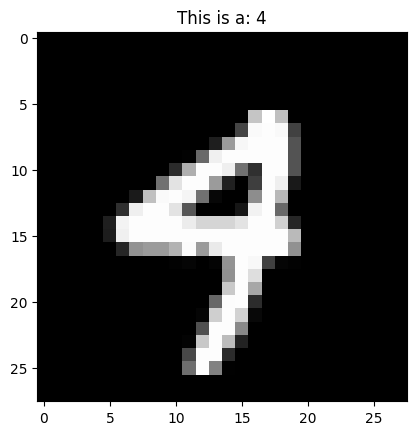

In [4]:
x, y = data.sample()
img = x.reshape(28, 28).numpy()
plt.imshow(img, cmap='gray')
plt.title(f"This is a: {y.item()}")
plt.show()

In [5]:
net.fit(data)

(10000, 9227)